<a href="https://www.kaggle.com/code/hashemi221022/prediction-of-receiving-a-loan-with-nb-knn-lr?scriptVersionId=147926537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score 
import statistics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# import dataset

In [2]:
data = pd.read_csv('/kaggle/input/bank-loans/Bank_Personal_Loan.csv')


# create dataframe

In [3]:
df = pd.DataFrame(data)
df.Experience =  np.abs(df.Experience)

In [4]:
# a = "1/35"
# b = a.replace("/", ".")
# b

# Convert string file to integer with replace  "/" to "." 

In [5]:
CCAvg = []
for num in df.CCAvg:
    CCAvg.append(num.replace("/", "."))
df.CCAvg = pd.DataFrame(CCAvg)

df['CCAvg'] = pd.to_numeric(df['CCAvg'])


# Dataframe

In [6]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Check the information in the database

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Checking the missing value in the data frame and its number and location

In [9]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Find the index of data that received loans and through it find the ages of people who received loans.

In [10]:
list_of_index = []
ages = []
for index, num in enumerate(df['Personal Loan']):
    if num == 1:
        list_of_index.append(index)

for i in list_of_index:
    ages.append(df['Age'][i])
df_age = pd.DataFrame(ages, columns=['Age'])
df_age.sort_values(by='Age', inplace=True)

# Classification of loan recipients by age to draw a visual chart

In [11]:
print(df['Age'].unique())

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


In [12]:
age_0_35 = []
age_35_49 = []
age_50_65 = []
age65 = []
for i in df_age.Age:
    if i < 35:
        age_0_35.append(i)
    if  49 > i >= 35:
        age_35_49.append(i)
    if 65 > i >= 49:
        age_50_65.append(i)
    if i >=65:
        age65.append(i)
print(len(age_0_35))
print(len(age_35_49))
print(len(age_50_65))
print(len(age65))
print(len(df_age))

print(f'percentage of < 35 : {len(age_0_35) /len(df_age)}')
print(f'percentage of 35-49 : {len(age_35_49) /len(df_age)}')
print(f'percentage of 50-65 : {len(age_50_65) /len(df_age)}')
print(f'percentage of > 65 : {len(age65) /len(df_age)}')

118
165
183
14
480
percentage of < 35 : 0.24583333333333332
percentage of 35-49 : 0.34375
percentage of 50-65 : 0.38125
percentage of > 65 : 0.029166666666666667


# Finding the index of the data that received loans and through it finding the number of family members who received loans

In [13]:
print(df['Family'].unique())

[4 3 1 2]


In [14]:
family = []
for i in list_of_index:
    family.append(df['Family'][i])
df_family = pd.DataFrame(family, columns=['Family'])
df_family.sort_values(by='Family', inplace=True)

In [15]:
# df_family

# Classification of people who received loans based on the number of family members to draw a visual chart

In [16]:
one_family = 0
two_family = 0
three_family = 0
four_family = 0
for count in df_family.Family:
    if count == 1:
        one_family += 1
    if count == 2:
        two_family += 1
    if count == 3:
        three_family += 1
    if count == 4:
        four_family += 1
print(one_family)
print(two_family)
print(three_family)
print(four_family)
print(len(df_family.Family))

print(f'percentage of one_family : {one_family / len(df_family.Family)}')
print(f'percentage of two_family : {two_family / len(df_family.Family)}')
print(f'percentage of three_family : {three_family / len(df_family.Family)}')
print(f'percentage of four_family : {four_family / len(df_family.Family)}')
         

107
106
133
134
480
percentage of one_family : 0.22291666666666668
percentage of two_family : 0.22083333333333333
percentage of three_family : 0.27708333333333335
percentage of four_family : 0.2791666666666667


# Finding the index of data that received loans and through it finding the education of people who received loans

In [17]:
print(df['Education'].unique())

[1 2 3]


In [18]:
education = []
for i in list_of_index:
    education.append(df['Education'][i])
df_education = pd.DataFrame(education, columns=['Education'])
df_education.sort_values(by='Education', inplace=True)
# df_education

# Classification of people who received loans based on their education to draw a visual chart

In [19]:
Education1 = 0
Education2 = 0
Education3 = 0
for counter in education:
    if counter == 1:
        Education1 += 1
    if counter == 2:
        Education2 += 1
    if counter == 3:
        Education3 += 1

print(Education1)
print(Education2)
print(Education3)
print(len(df_education.Education))
print(f'percentage of Education1 : {Education1 / len(df_education.Education)}')
print(f'percentage of Education2  : {Education2 / len(df_education.Education)}')
print(f'percentage of Education3 : {Education3 / len(df_education.Education)}')


93
182
205
480
percentage of Education1 : 0.19375
percentage of Education2  : 0.37916666666666665
percentage of Education3 : 0.4270833333333333


# Finding the index of data that received loans and through it finding those who use credit cards or not and received loans

In [20]:
print(df.CreditCard.unique())

[0 1]


In [21]:
credit_cart_use = []
for i in list_of_index:
    credit_cart_use.append(df['CreditCard'][i])
df_credit_cart = pd.DataFrame(credit_cart_use, columns=['CreditCard'])
df_credit_cart.sort_values(by='CreditCard', inplace=True)
# df_credit_cart

# Classification of people who received loans based on  using their credit card or not and draw a visual chart

In [22]:
use_creditcart = 0
dontuse_creditcart = 0
for counter_Ck in credit_cart_use:
    if counter_Ck == 1:
        use_creditcart +=1
    else:
        dontuse_creditcart +=1
print(use_creditcart)
print(dontuse_creditcart)
print(f'percentage of use_creditcart  : {use_creditcart / len(df_credit_cart.CreditCard)}')
print(f'percentage of dontuse_creditcart : {dontuse_creditcart / len(df_credit_cart.CreditCard)}')



143
337
percentage of use_creditcart  : 0.29791666666666666
percentage of dontuse_creditcart : 0.7020833333333333


In [23]:
# 143/480

In [24]:
# 337/480

# Finding the index of data that received loans and through it finding people based on using online services and receive loans or not.

In [25]:
online = []
for i in list_of_index:
    online.append(df['Online'][i])
df_online = pd.DataFrame(online, columns=['Online'])
df_online.sort_values(by='Online', inplace=True)
# df_online

# Classification of people who received loans based on using or not using online services to draw a visual chart

In [26]:
use_online = 0
dontuse_online = 0
for counter_on in online:
    if counter_on == 1:
        use_online += 1
    else:
        dontuse_online += 1
print(use_online)
print(dontuse_online)
print(f'percentage of use_online  : {use_online / len(df_online.Online)}')
print(f'percentage of dontuse_online : {dontuse_online / len(df_online.Online)}')

291
189
percentage of use_online  : 0.60625
percentage of dontuse_online : 0.39375


# Finding the index of data that received loans and through it finding people based on experience or work experience and receiving loans

In [27]:
experience = []
for i in list_of_index:
    experience.append(df['Experience'][i])
df_experience = pd.DataFrame(experience, columns=['Experience'])
df_experience.sort_values(by='Experience', inplace=True)
# df_experience

# Classification of people who received loans based on experience or work history to draw a visual chart

In [28]:

experience0_10 = 0
experience10_20 = 0
experience20_30 = 0
experience30_43 = 0
for counter_Ex in experience:
    if counter_Ex < 10:
        experience0_10 += 1
    if 20 > counter_Ex >= 10:
        experience10_20 += 1
    if 30 > counter_Ex >= 20:
        experience20_30 += 1
    if counter_Ex >= 30:
        experience30_43 += 1


print(len(df_experience.Experience))
print(f"percentage of experience0_9 : {experience0_10 / len(df_experience.Experience)}")
print(f"percentage of experience10_19 : {experience10_20 / len(df_experience.Experience)}")
print(f"percentage of experience20_29 : {experience20_30 / len(df_experience.Experience)}")
print(f"percentage of experience30_43 : {experience30_43 / len(df_experience.Experience)}")


480
percentage of experience0_9 : 0.2625
percentage of experience10_19 : 0.225
percentage of experience20_29 : 0.25625
percentage of experience30_43 : 0.25625


# Finding the index of data that received loans and through it finding people based on income and receiving loans

In [29]:
income = []
for i in list_of_index:
    income.append(df['Income'][i])
df_income = pd.DataFrame(income, columns=['Income'])
df_income.sort_values(by='Income', inplace=True)
# df_income

# Classification of people who received loans based on income to draw a visual chart

In [30]:
income60_100 = 0
income100_150 = 0
income150_203 = 0
for counter_in in income:
    if counter_in < 100:
        income60_100 += 1
    if 150 > counter_in >= 100:
        income100_150 += 1
    if 203 > counter_in >= 150:
        income150_203 += 1
    

print(income60_100)
print(len(df_income.Income))
print(f"percentage of income60_100 : {income60_100 / len(df_income.Income)}")
print(f"percentage of income100_150 : {income100_150 / len(df_income.Income)}")
print(f"percentage of income150_203 : {income150_203 / len(df_income.Income)}")


41
480
percentage of income60_100 : 0.08541666666666667
percentage of income100_150 : 0.45625
percentage of income150_203 : 0.45625


# Find the index of the data that received a loan and through it find based on the activeness of account security and receiving a loan.

In [31]:
secur_acc = []
for i in list_of_index:
    secur_acc.append(df['Securities Account'][i])
df_SA = pd.DataFrame(secur_acc, columns=['Securities Account'])
df_SA.sort_values(by='Securities Account', inplace=True)

# Classification of people who have received loans based on whether their account security is active or not to draw a visual chart

In [32]:
use_secur_acc = 0
dontuse_secur_acc = 0
for count_sa in secur_acc:
    if count_sa == 1:
        use_secur_acc += 1
    if count_sa == 0:
        dontuse_secur_acc += 1

print(f"percentage of use security accont :{use_secur_acc / len(df_SA['Securities Account'])}")
print(f"percentage of dont use security accont : {dontuse_secur_acc / len(df_SA['Securities Account'])}")


percentage of use security accont :0.125
percentage of dont use security accont : 0.875


# Finding the index of data that received loans and through it finding people based on CD account and receiving loans

In [33]:
cd_acc = []
for i in list_of_index:
    cd_acc.append(df['CD Account'][i])
df_CA = pd.DataFrame(cd_acc, columns=['CD Account'])
df_CA.sort_values(by='CD Account', inplace=True)

# Classification of people who have received loans based on whether or not the CD account is active to draw a visual chart

In [34]:
use_cd_acc = 0
dontuse_cd_acc = 0
for count_ca in cd_acc:
    if count_ca == 1:
        use_cd_acc += 1
    if count_ca == 0:
        dontuse_cd_acc += 1

print(f"percentage of use cd accont :{use_cd_acc / len(df_CA['CD Account'])}")
print(f"percentage of dont use cd accont : {dontuse_cd_acc / len(df_CA['CD Account'])}")

percentage of use cd accont :0.2916666666666667
percentage of dont use cd accont : 0.7083333333333334


# Counting the number of people based on the age of people

In [35]:
# sns.countplot(x='Age', data=df_age)
# plt.xticks(rotation=90)
# plt.show()

# Counting the number of people based on whether or not they received a loan

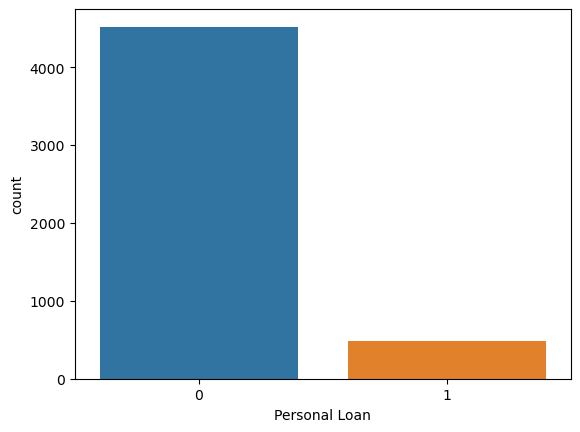

In [36]:
sns.countplot(x='Personal Loan', data=data)
plt.show()

# Counting the number of people based on the age of people

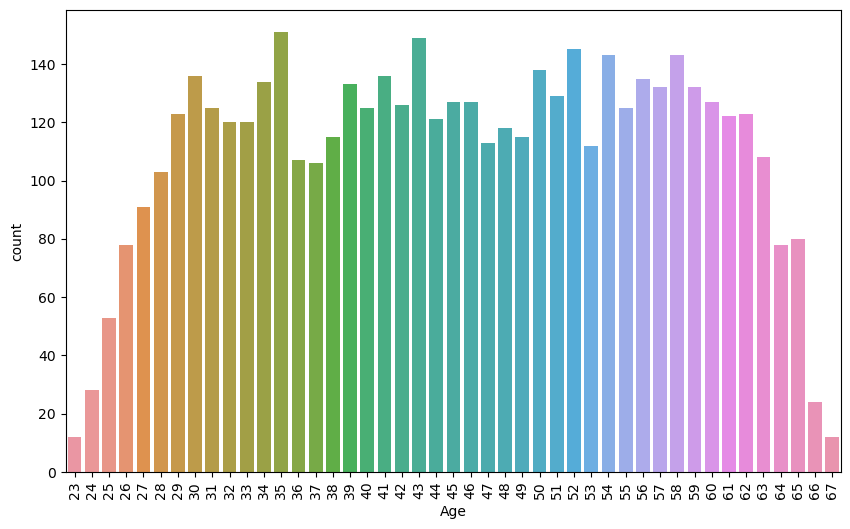

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=data)
plt.xticks(rotation= 90)
plt.show()

# Drawing a pie chart to visually check the features and get a loan

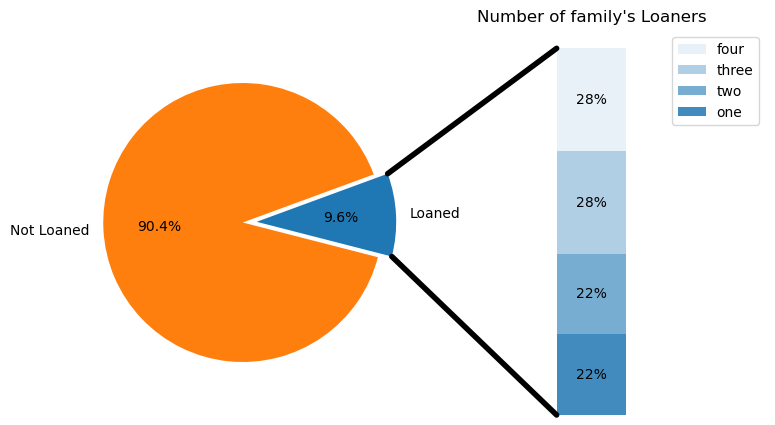

In [38]:

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.22, .22, .28, .28]
age_labels = ['one', 'two', 'three', 'four']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Number of family's Loaners")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Number_of_family.jpeg', dpi=1200)
plt.show()

The pie chart above shows that only 10% of the people received loans, and people with one and two children received 22% each, and people with three and four children received 28% loans with a six percent increase each.

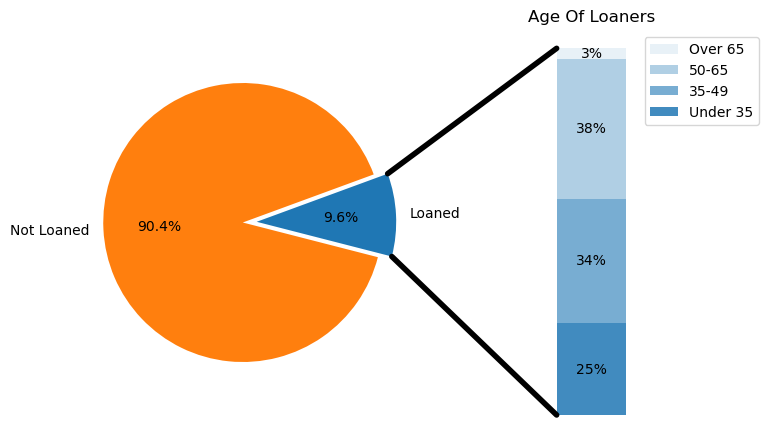

In [39]:

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.25, .34, .38, .03]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Age.jpeg', dpi=1200)
plt.show()

The pie chart above shows that people of different ages received different loans, people under 35 years old received 25% of loans, and people between 35 and 49 received about 34% of loans, and people between 50 and 65 years old received the most loans. The lowest amount of loans received was for people over 65 years old  

In [40]:
# 46.73+47.17+ 37.59+ 37.31

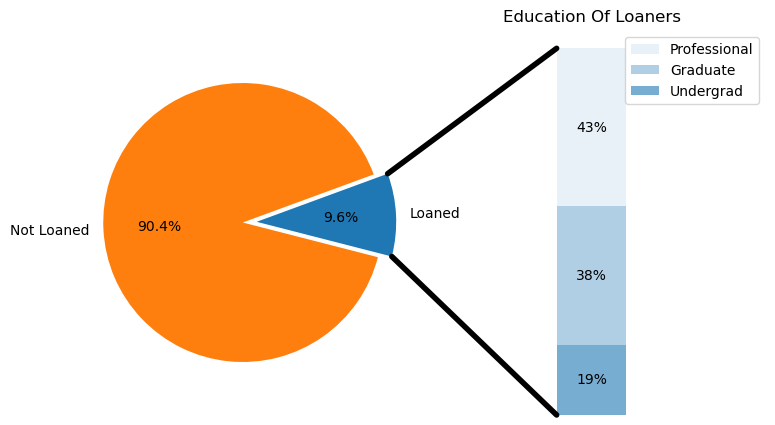

In [41]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.19, .38, .43]
age_labels = ['Undergrad', 'Graduate', 'Professional']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Education Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Education.jpeg', dpi=1200)

plt.show()

The pie chart above clearly shows that with the increase in education, the amount of loans received by people also increases, so that people with higher education have allocated about 43% of the loans.

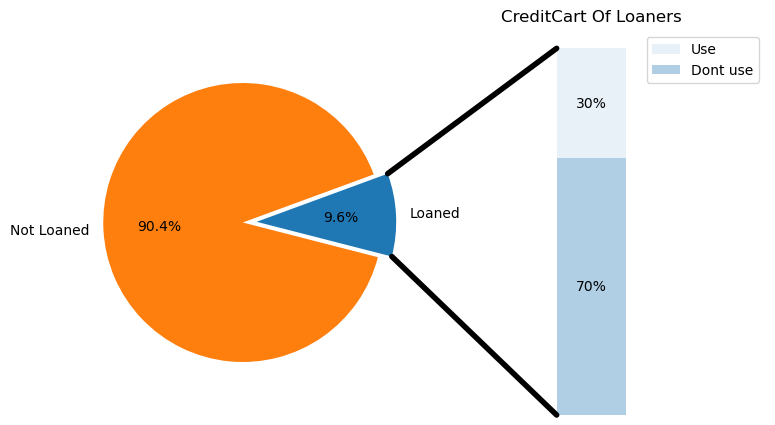

In [42]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.70, .30]
age_labels = ['Dont use', 'Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('CreditCart Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('CreditCart.jpeg', dpi=1200)
plt.show()

The chart above shows that people who have not used their credit card yet have a much greater desire to receive a loan, and about 70% of their loans have been received, and people who have used their credit card have received about 30% of their loans.

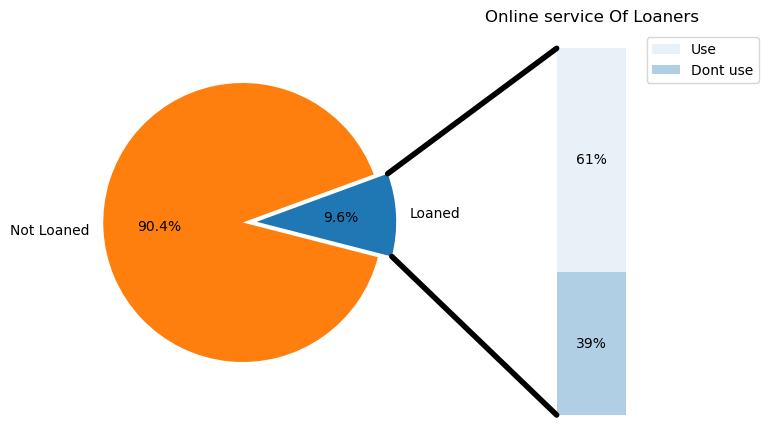

In [43]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.39, .61]
age_labels = ['Dont use', 'Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Online service Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Online_service.jpeg', dpi=1200)

plt.show()

The pie chart above shows that people who did not use the online service received more loans and were more inclined to receive about 61% of the loans, and people who used the online service received 39% of the loans.

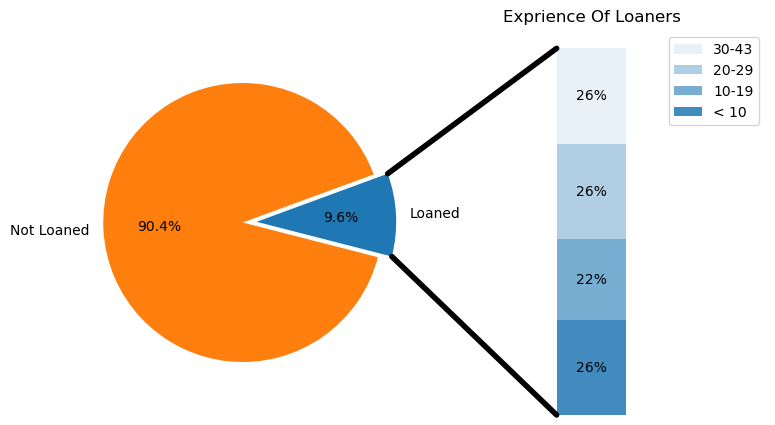

In [44]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.26, .22, .26, .26]
age_labels = ['< 10', '10-19', '20-29', '30-43']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Exprience Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Exprience.jpeg', dpi=1200)

plt.show()



The pie chart above shows that experience or work experience has a different effect on receiving a loan, except for people with a work experience of 10 to 19 years, who were about 22% of the borrowers, and the rest of the people from less than 10 to about 41 years were 26% of the borrowers. He has had a history of up to 43 years here, but the longest history of receiving a loan was 41 years

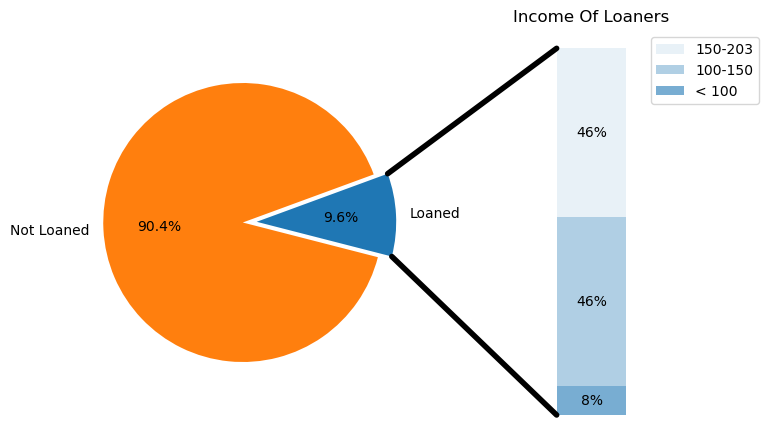

In [45]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.08, .46, .46]
age_labels = ['< 100', '100-150', '150-203']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Income Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Income.jpeg', dpi=1200)

plt.show()

The pie chart above shows that income plays an important role in getting a loan and it can be seen that people with income below 100 have about 8% and people above 100 to 203 have received the most loans with 46%, but the interesting thing here is that the income ranged from 8 to 224 People under 60 and over 203 did not receive loans, which means that people with low incomes were not able to receive and repay loans, and people with high incomes did not need to receive loans.

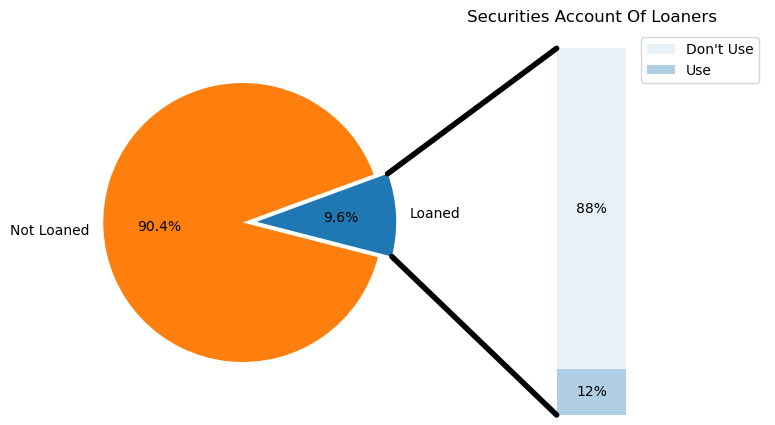

In [46]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.125, .875]
age_labels = ['Use', 'Don\'t Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Securities Account Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Securities_Account.jpeg', dpi=1200)

plt.show()

The pie chart above shows a significant increase in people's willingness to borrow from their security account, which included 88% of borrowers who did not use it, and 18% of borrowers who used it.

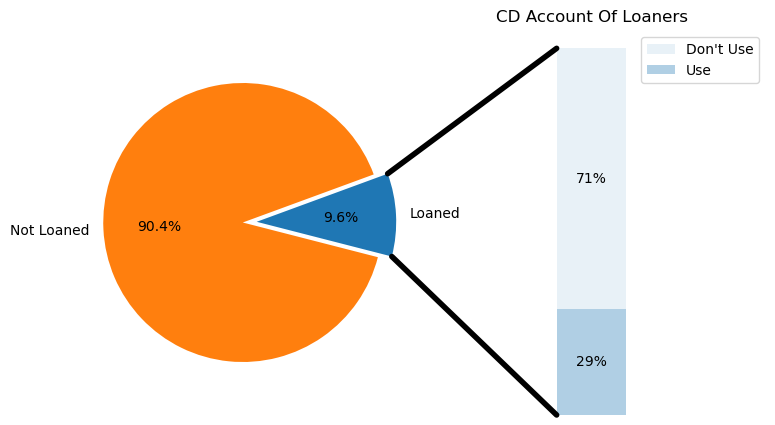

In [47]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.29, .71]
age_labels = ['Use', 'Don\'t Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('CD Account Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('CD_Accont.jpeg', dpi=1200)
plt.show()

The pie chart above shows that for the C account as well as the security account, people who did not use it received the most loans with 71%, while people who used it received 29% of the loan.

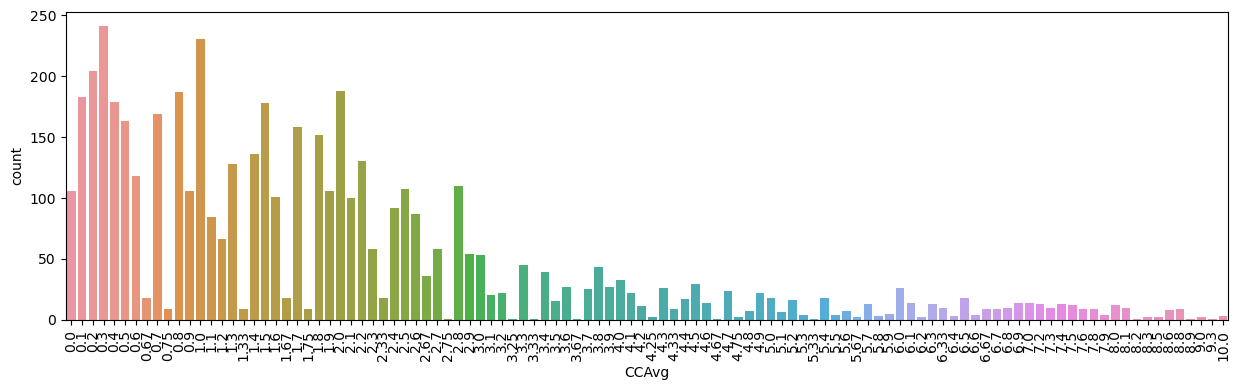

In [48]:
df_sort_ccavg =df.sort_values(by='CCAvg')
plt.figure(figsize=(15, 4))
sns.countplot(x='CCAvg', data=df_sort_ccavg)
plt.xticks(rotation=90)
plt.show()

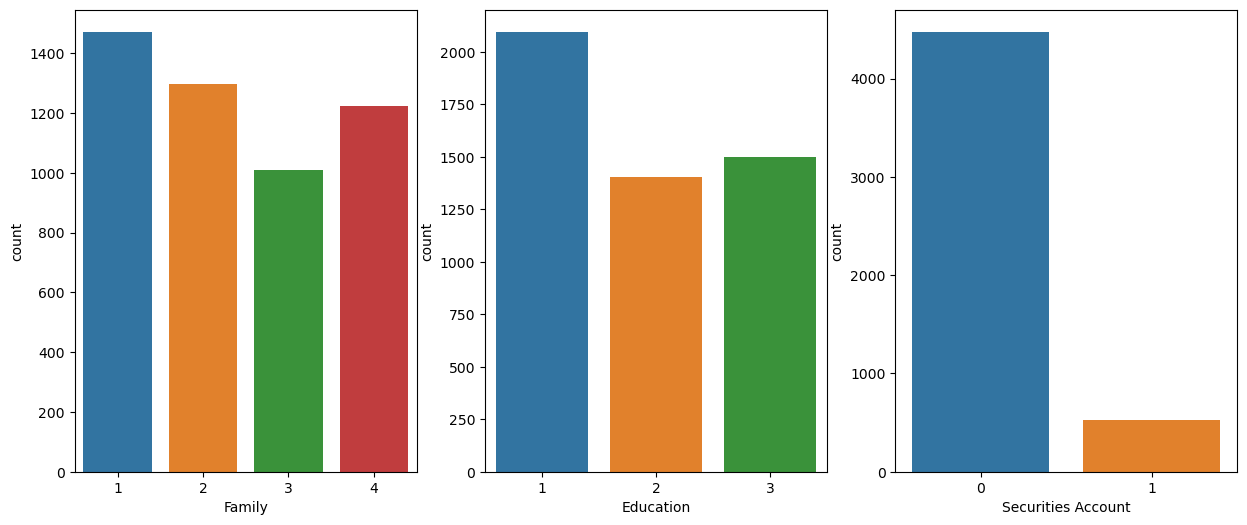

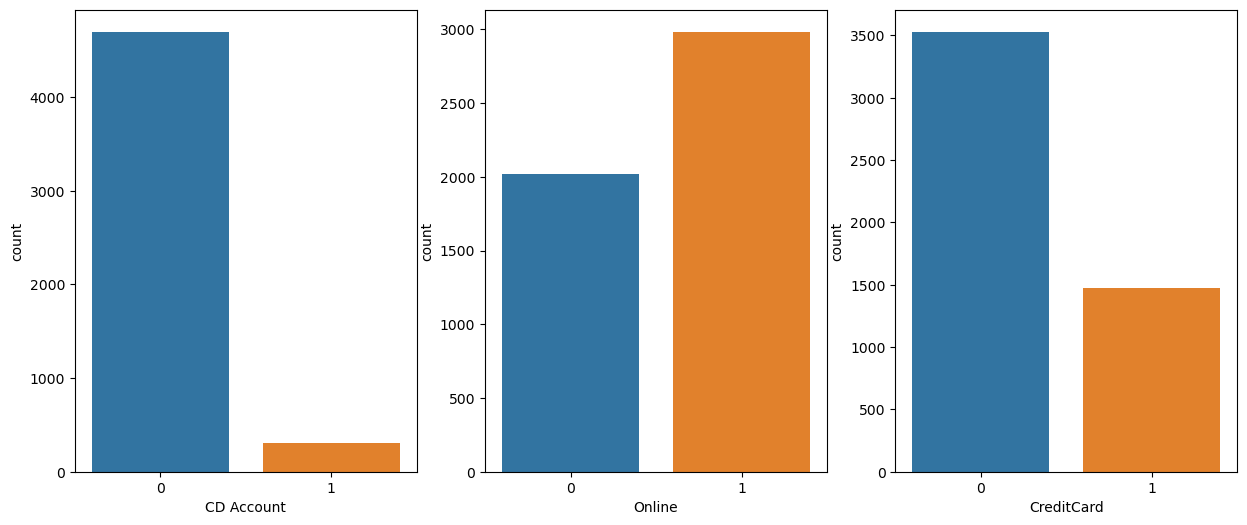

In [49]:
categorical = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15, 6])
    plt.subplot(1, 3, 1)
    sns.countplot(x=categorical[i], data=df)
    i +=1
    plt.subplot(1, 3, 2)
    sns.countplot(x=categorical[i], data=df)
    i += 1
    plt.subplot(1, 3, 3)
    sns.countplot(x=categorical[i], data=df)
    i += 1
    plt.show()

According to the plot above, the highest statistical sample is for people with one child, and the lowest statistical sample is for people with 3 children, also the highest statistical sample is for the uneducated and the lowest is for the educated, the highest statistical sample is for people who have a security account, etc. They didn't use their D account and credit card, and in the end, the majority of statistics are for people who used online services

# The boxplot below can easily determine the noise values ​​in the sample

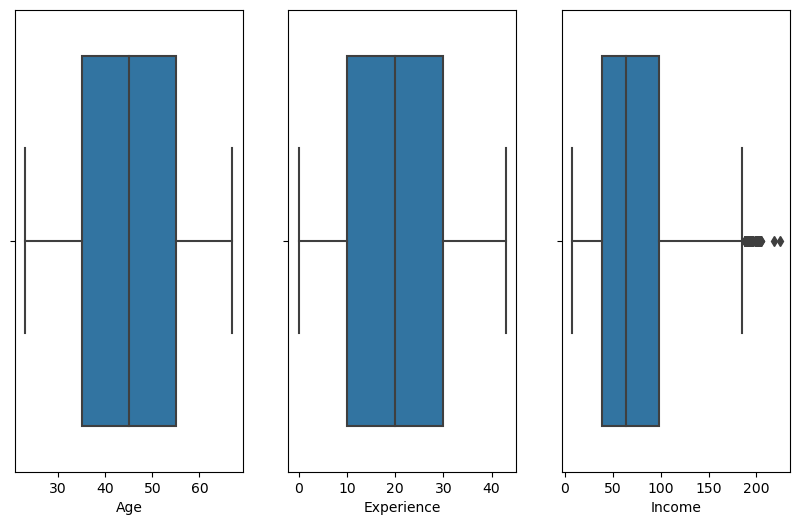

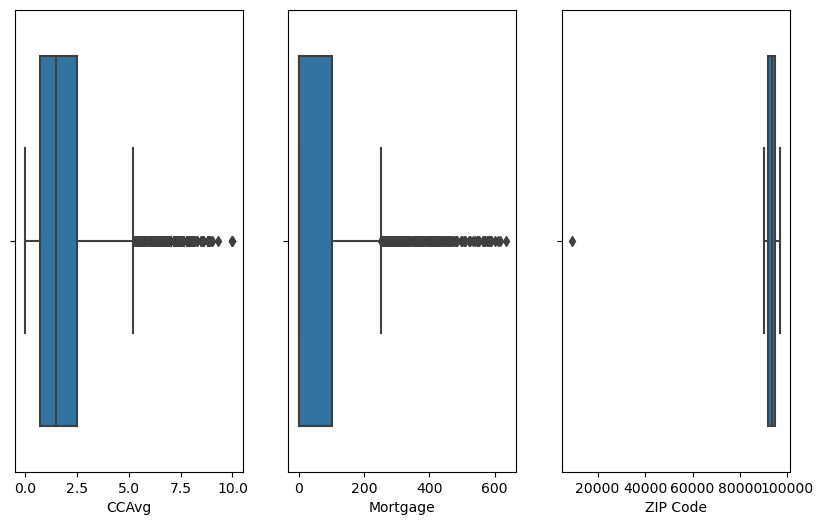

In [50]:
nomerical = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIP Code']
i = 0
while i < 4:
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=nomerical[i], data=df)
    i += 1
    plt.subplot(1, 3, 2)
    sns.boxplot(x=nomerical[i], data=df)
    i += 1
    plt.subplot(1, 3, 3)
    sns.boxplot(x=nomerical[i], data=df)
    i += 1
    plt.show()

# Scatter plot can also be used to better find the noise, which was not observed in this sample

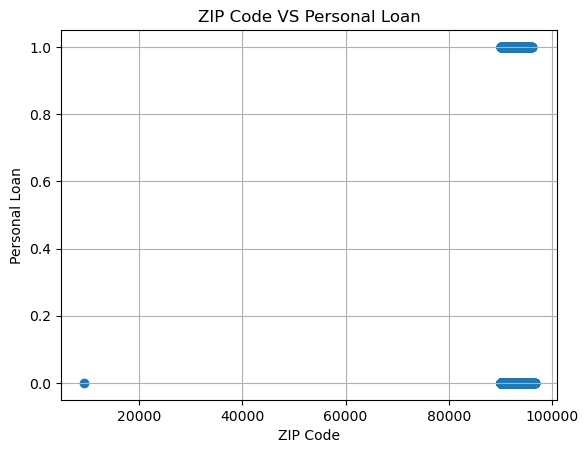

In [51]:
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.title('ZIP Code VS Personal Loan')
plt.xlabel('ZIP Code')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

# In the above plot, all zip codes are in the range of 90000 to 100000, except for one data that is in the range below 1000.

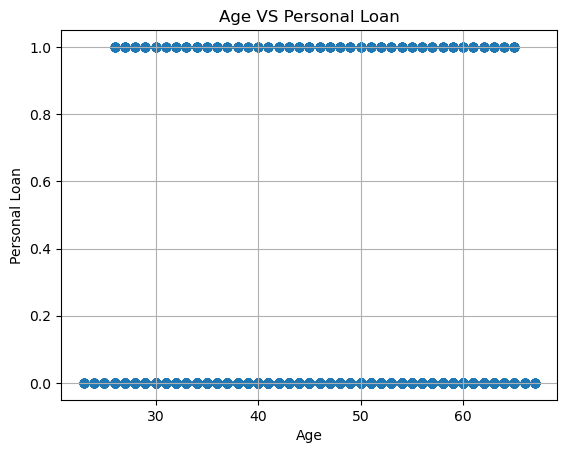

In [52]:
plt.scatter(df['Age'], df['Personal Loan'])
plt.title('Age VS Personal Loan')
plt.xlabel('Age')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

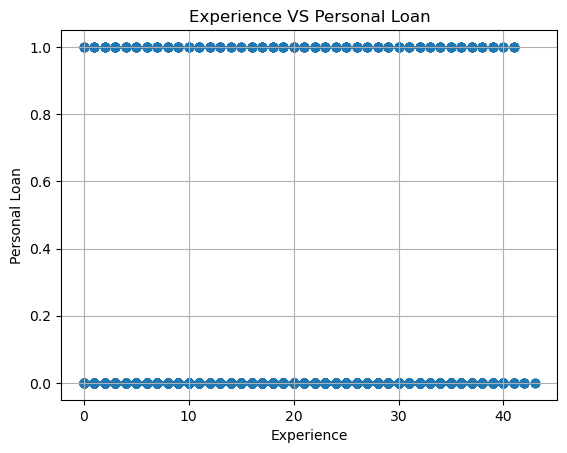

In [53]:
plt.scatter(df['Experience'], df['Personal Loan'])
plt.title('Experience VS Personal Loan')
plt.xlabel('Experience')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

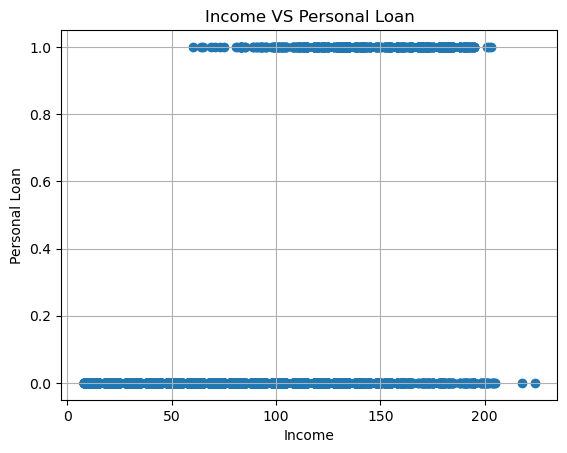

In [54]:
plt.scatter(df['Income'], df['Personal Loan'])
plt.title('Income VS Personal Loan')
plt.xlabel('Income')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

According to the above plot, it can be seen that the range of receiving loans is from income above 50 to almost 200, while those above 200 and below 50 did not receive loans.

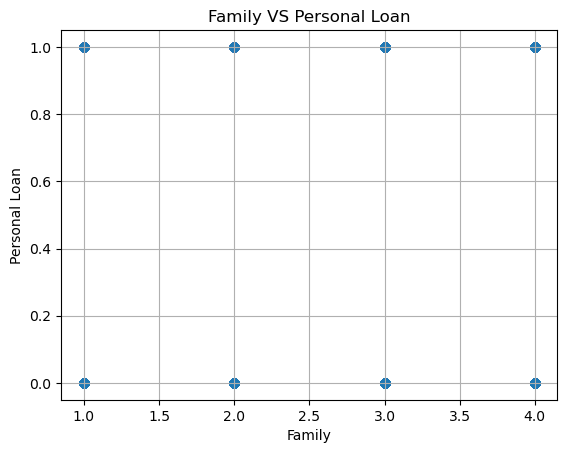

In [55]:
plt.scatter(df['Family'], df['Personal Loan'])
plt.title('Family VS Personal Loan')
plt.xlabel('Family')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

According to the high scatter of receiving or not receiving loans in all families with different populations

# Examining the figures together and finding the relationship between the figures

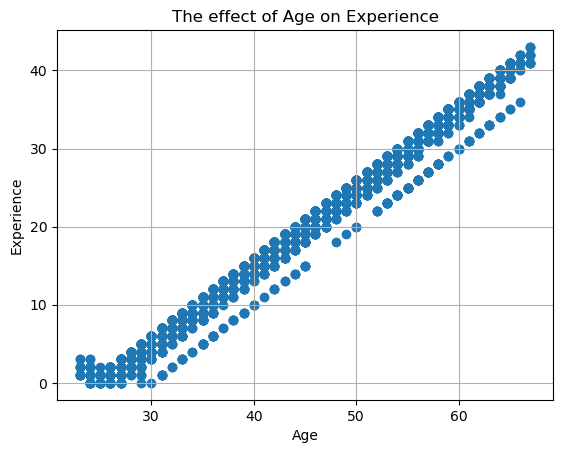

In [56]:
plt.scatter(df['Age'], df['Experience'])
plt.title('The effect of Age on Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.grid()
plt.show()

According to the high scatter with increasing age and increased work experience, this is a tip for when we intend to integrate features to increase the score in the model. These two features can be multiplied together.

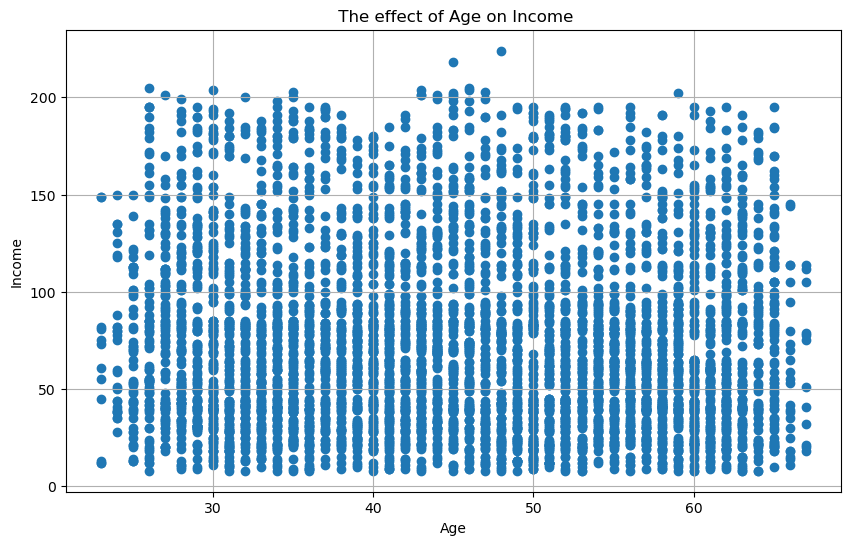

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'])
plt.title(' The effect of Age on Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.show()

Due to the high scatter, the distribution is more visible in the income below 100

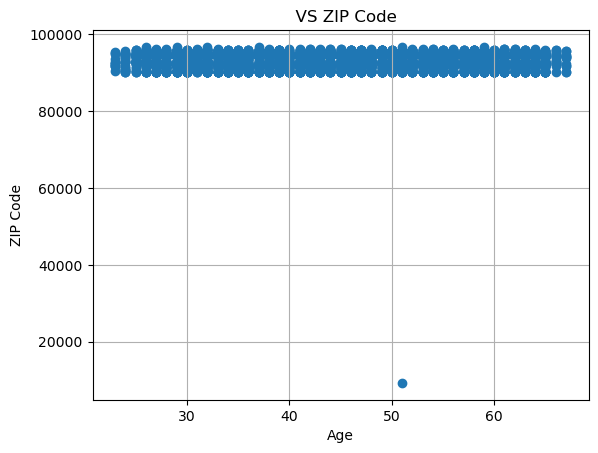

In [58]:
plt.scatter(df['Age'], df['ZIP Code'])
plt.title('  VS ZIP Code')
plt.xlabel('Age')
plt.ylabel('ZIP Code')
plt.grid()
plt.show()

According to the above scatter, except for one data that is in the zip code below 10000 and is over 50, the rest have a distribution between 90000 and 100000

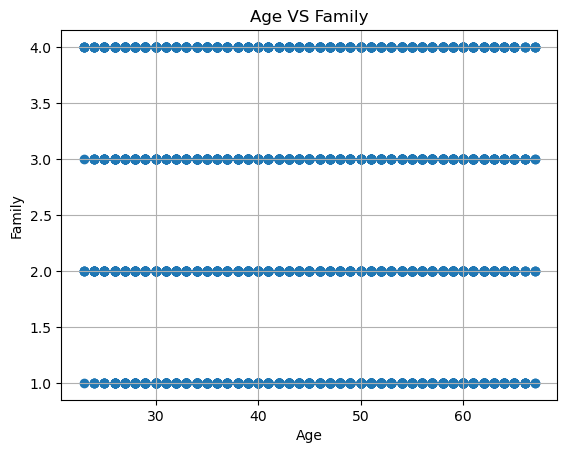

In [59]:
plt.scatter(df['Age'], df['Family'])
plt.title('Age VS Family')
plt.xlabel('Age')
plt.ylabel('Family')
plt.grid()
plt.show()

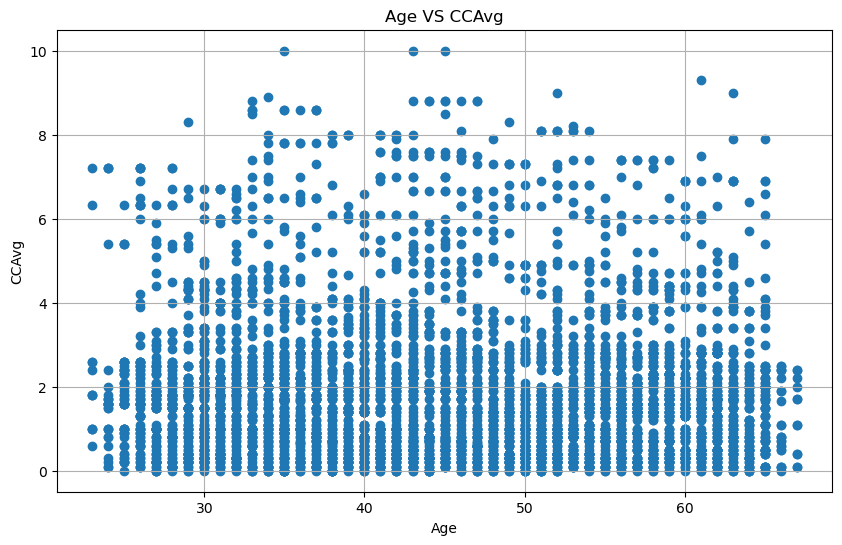

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['CCAvg'])
plt.title('Age VS CCAvg')
plt.xlabel('Age')
plt.ylabel('CCAvg')
plt.grid()
plt.show()

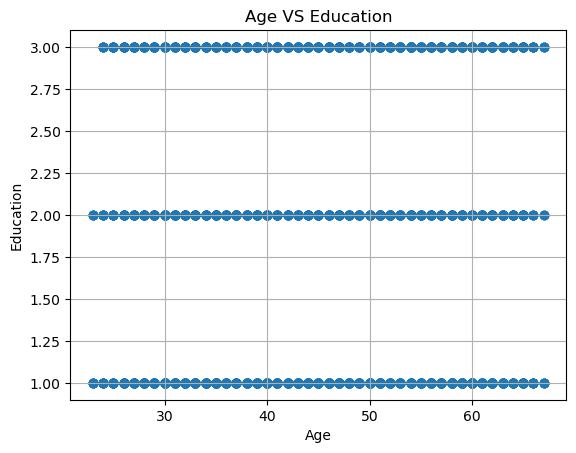

In [61]:
plt.scatter(df['Age'], df['Education'])
plt.title('Age VS Education')
plt.xlabel('Age')
plt.ylabel('Education')
plt.grid()
plt.show()

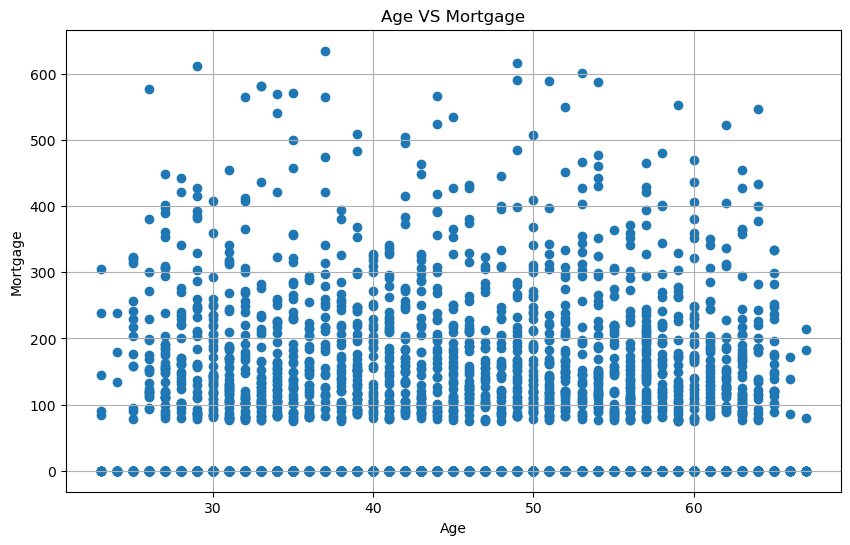

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Mortgage'])
plt.title('Age VS Mortgage')
plt.xlabel('Age')
plt.ylabel('Mortgage')
plt.grid()
plt.show()

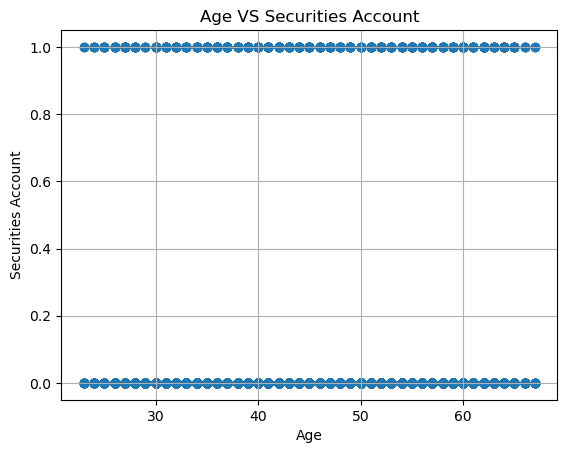

In [63]:
plt.scatter(df['Age'], df['Securities Account'])
plt.title('Age VS Securities Account')
plt.xlabel('Age')
plt.ylabel('Securities Account')
plt.grid()
plt.show()

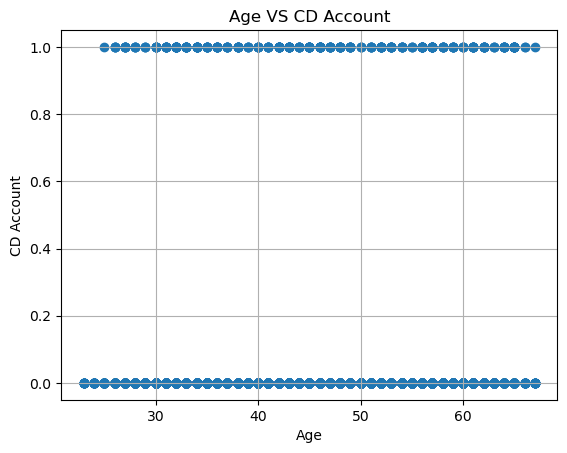

In [64]:
plt.scatter(df['Age'], df['CD Account'])
plt.title('Age VS CD Account')
plt.xlabel('Age')
plt.ylabel('CD Account')
plt.grid()
plt.show()

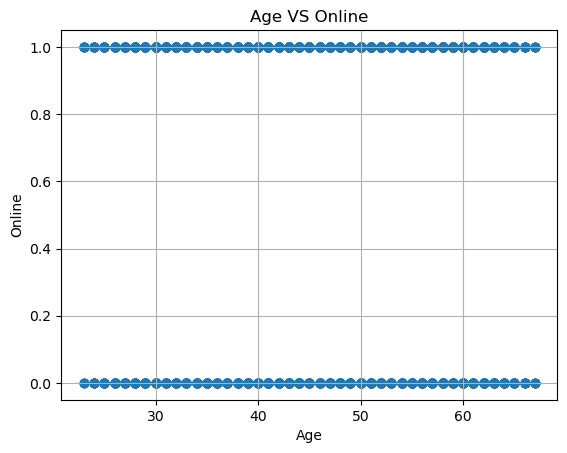

In [65]:
plt.scatter(df['Age'], df['Online'])
plt.title('Age VS Online')
plt.xlabel('Age')
plt.ylabel('Online')
plt.grid()
plt.show()

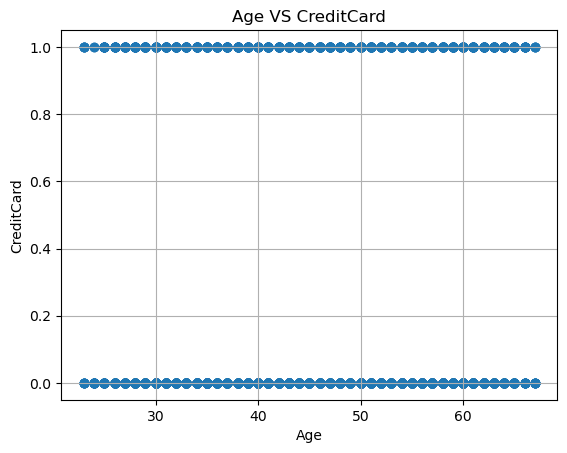

In [66]:
plt.scatter(df['Age'], df['CreditCard'])
plt.title('Age VS CreditCard')
plt.xlabel('Age')
plt.ylabel('CreditCard')
plt.grid()
plt.show()

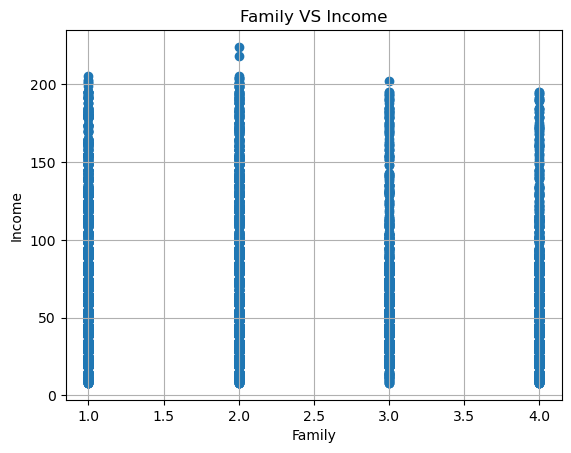

In [67]:
plt.scatter(df['Family'], df['Income'])
plt.title('Family VS Income')
plt.xlabel('Family')
plt.ylabel('Income')
plt.grid()
plt.show()

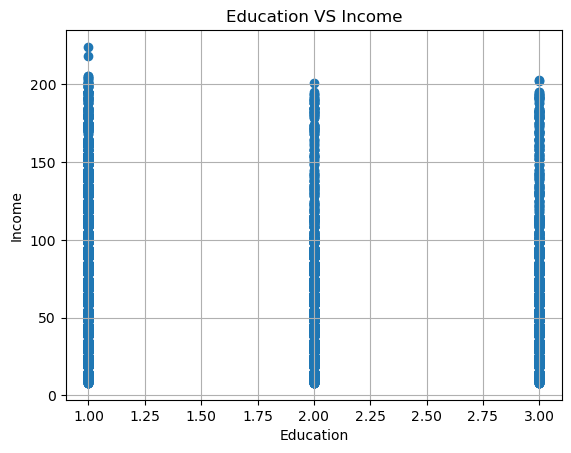

In [68]:
plt.scatter(df['Education'], df['Income'])
plt.title('Education VS Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.grid()
plt.show()

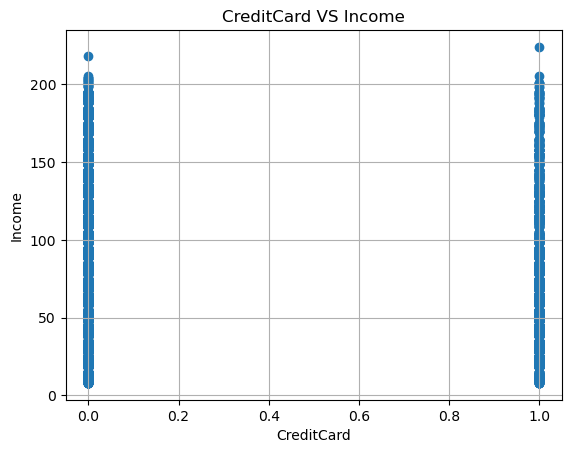

In [69]:
plt.scatter(df['CreditCard'], df['Income'])
plt.title('CreditCard VS Income')
plt.xlabel('CreditCard')
plt.ylabel('Income')
plt.grid()
plt.show()

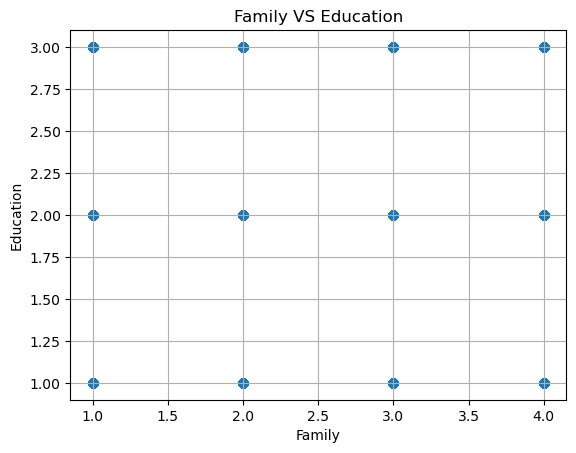

In [70]:
plt.scatter(df['Family'], df['Education'])
plt.title('Family VS Education')
plt.xlabel('Family')
plt.ylabel('Education')
plt.grid()
plt.show()

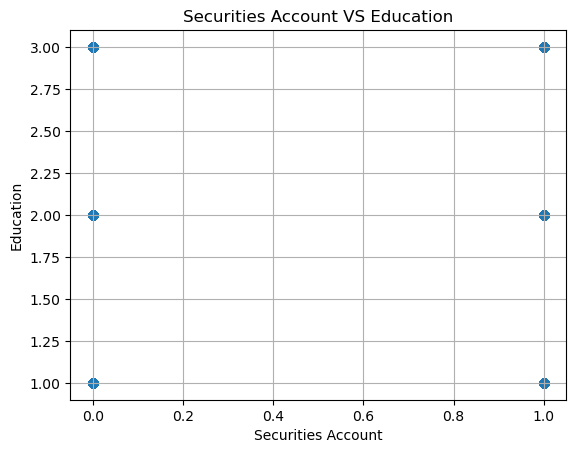

In [71]:
plt.scatter(df['Securities Account'], df['Education'])
plt.title('Securities Account VS Education')
plt.xlabel('Securities Account')
plt.ylabel('Education')
plt.grid()
plt.show()

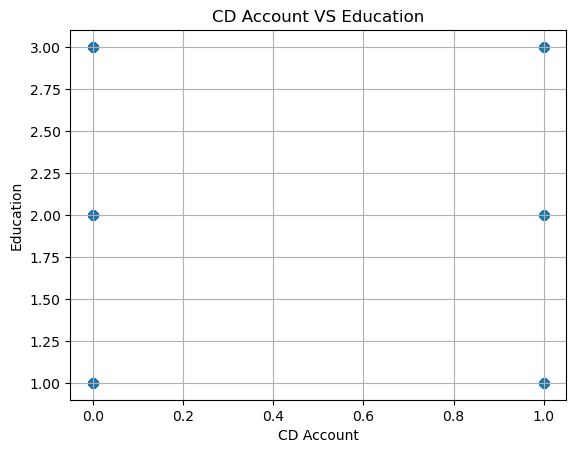

In [72]:
plt.scatter(df['CD Account'], df['Education'])
plt.title('CD Account VS Education')
plt.xlabel('CD Account')
plt.ylabel('Education')
plt.grid()
plt.show()

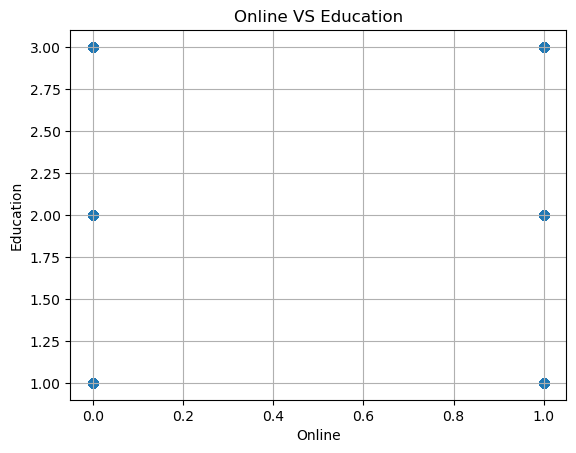

In [73]:
plt.scatter(df['Online'], df['Education'])
plt.title('Online VS Education')
plt.xlabel('Online')
plt.ylabel('Education')
plt.grid()
plt.show()

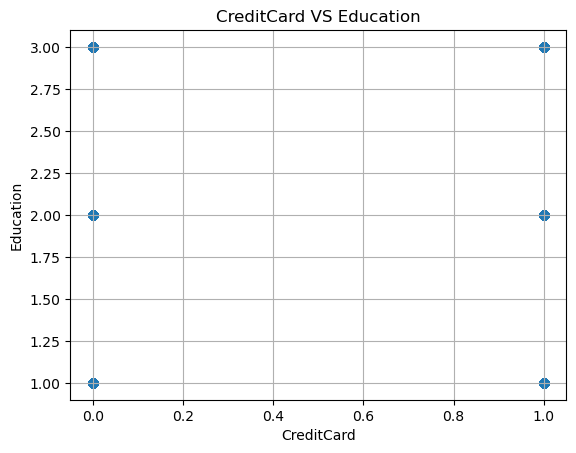

In [74]:
plt.scatter(df['CreditCard'], df['Education'])
plt.title('CreditCard VS Education')
plt.xlabel('CreditCard')
plt.ylabel('Education')
plt.grid()
plt.show()

In [75]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Remove ID

In [76]:
df.drop('ID', axis=1, inplace=True)

In [77]:
df_sp = df.copy()

## Normalized

In [78]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
# unscaled = scaler.inverse_transform(scaled)
df = pd.DataFrame(scaled, columns=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ])

In [79]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.468247,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.096000,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.265470,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.232558,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.465116,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.697674,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# LogisticRegression MODEL

In [80]:
X = pd.DataFrame(df.drop('Personal Loan', axis=1))
y = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [81]:
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.441860,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.348837,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.209302,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.186047,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.093023,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.906977,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.930233,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [82]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [84]:
model_logreg = LogisticRegression()

In [85]:
model_logreg.fit(X_train, y_train.ravel())

LogisticRegression()

In [86]:
y_pred = model_logreg.predict(X_test)

In [87]:
model_logreg.classes_

array([0., 1.])

In [88]:
compare =pd.DataFrame({'actual': y_test.flatten(),
          'predict' : y_pred.flatten()})

In [89]:
compare

,actual,predict
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<h2>Score</h2> 

In [90]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.955


In [91]:
model_logreg.score(X, y)

0.952

In [92]:
confusion_matrix(y, model_logreg.predict(X))

array([[4480,   40],
       [ 200,  280]])

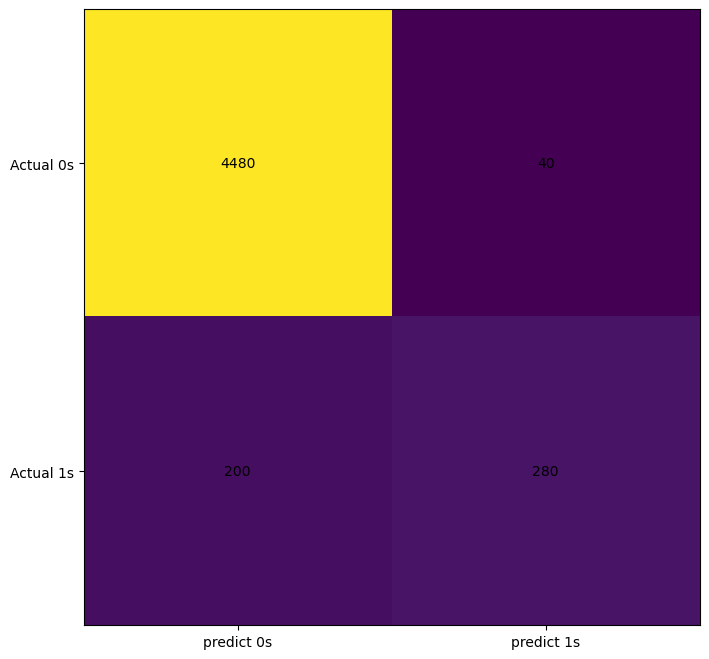

In [93]:
cm = confusion_matrix(y, model_logreg.predict(X)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

In [94]:
print(classification_report(y, model_logreg.predict(X)))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      4520
         1.0       0.88      0.58      0.70       480

    accuracy                           0.95      5000
   macro avg       0.92      0.79      0.84      5000
weighted avg       0.95      0.95      0.95      5000



## crass validation_logreg

In [95]:
kfold = KFold(10)
crros_val = cross_val_score(model_logreg, X_train, y_train.ravel(), cv= kfold)
print(crros_val)

[0.94   0.9425 0.9575 0.945  0.9425 0.9625 0.9425 0.9625 0.9625 0.945 ]


# MultinomialNB MODEL

In [96]:
X2 = pd.DataFrame(df.drop('Personal Loan', axis=1))
y2 = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [97]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, random_state=42)

In [98]:
model_NB = MultinomialNB()

In [99]:
model_NB.fit(X2_train, y2_train.ravel())

MultinomialNB()

In [100]:
y2_pred = model_NB.predict(X2_test)

In [101]:
compare2 =pd.DataFrame({'actual': y2_test.flatten(),
          'predict' : y2_pred.flatten()})
compare2

,actual,predict
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<h2>Score</h2> 

In [102]:
print('Acourecy : ',metrics.accuracy_score(y2_test, y2_pred))

Acourecy :  0.895


In [103]:
model_NB.score(X2, y2)

0.9054

In [104]:
confusion_matrix(y2, model_NB.predict(X2))

array([[4520,    0],
       [ 473,    7]])

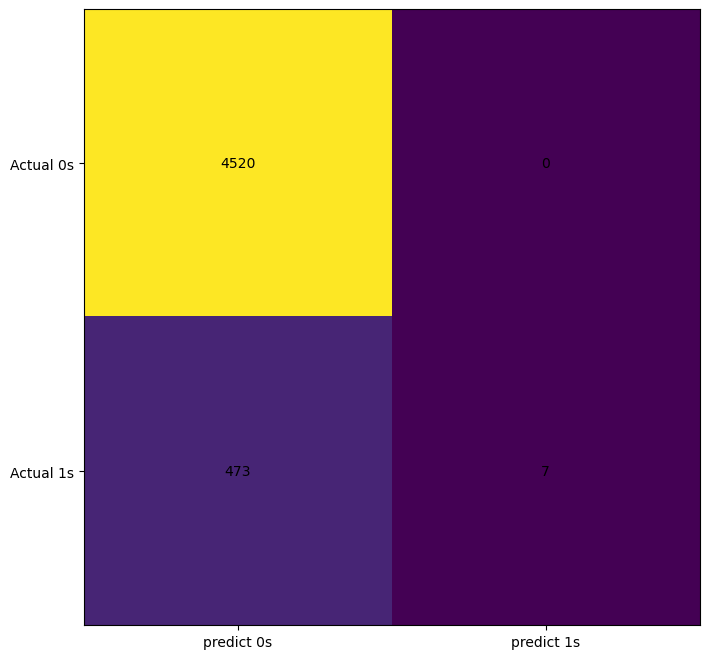

In [105]:
cm = confusion_matrix(y2, model_NB.predict(X2)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

In [106]:
print(classification_report(y2, model_NB.predict(X2)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4520
         1.0       1.00      0.01      0.03       480

    accuracy                           0.91      5000
   macro avg       0.95      0.51      0.49      5000
weighted avg       0.91      0.91      0.86      5000



## crass validation_NB

In [107]:
kfold2 = KFold(10)
cross_val_2 = cross_val_score(model_NB, X2_train, y2_train.ravel(), cv=kfold2)
print(cross_val_2)

[0.9    0.895  0.92   0.885  0.8925 0.9225 0.9125 0.935  0.92   0.8925]


In [108]:
print(np.mean(cross_val_2))

0.9075000000000001


# BernoulliNB MODEL

In [109]:
X3 = pd.DataFrame(df.drop('Personal Loan', axis=1))
y3 = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [110]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.2, random_state=42)

In [111]:
model_BNB = BernoulliNB()

In [112]:
model_BNB.fit(X3_train, y3_train.ravel())

BernoulliNB()

In [113]:
y3_pred = model_BNB.predict(X3_test)

In [114]:
compare3 =pd.DataFrame({'actual': y3_test.flatten(),
          'predict' : y3_pred.flatten()})
compare3

,actual,predict
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<h2>Score</h2> 

In [115]:
print("Accurecy: ", metrics.accuracy_score(y3_test, y3_pred))

Accurecy:  0.903


In [116]:
confusion_matrix(y3, model_BNB.predict(X3))

array([[4450,   70],
       [ 387,   93]])

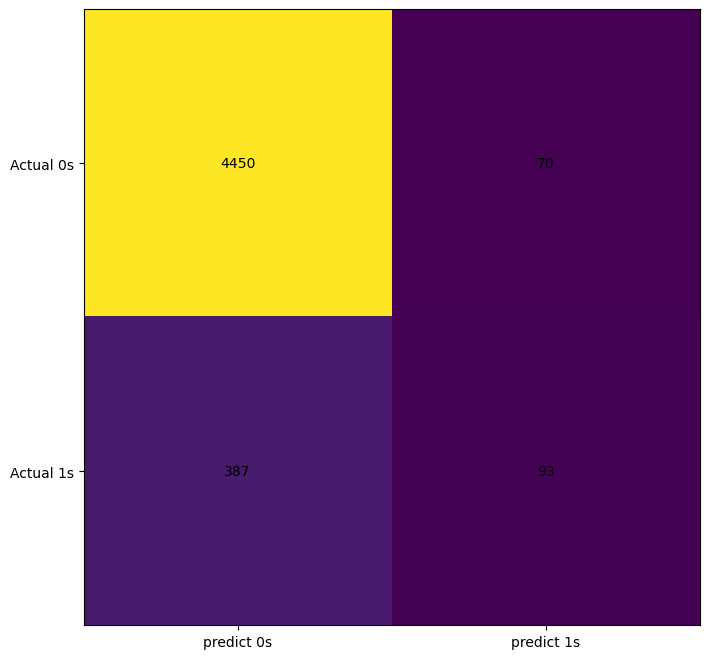

In [117]:
cm = confusion_matrix(y3, model_BNB.predict(X3)) 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

## cross_validation_BNB

In [118]:
kfold3 = KFold(20)
cross_val_3 = cross_val_score(model_BNB, X3_train, y3_train.ravel(), cv=kfold3)
print(cross_val_3)

[0.895 0.93  0.885 0.89  0.95  0.93  0.87  0.89  0.905 0.87  0.91  0.945
 0.9   0.93  0.925 0.95  0.905 0.915 0.91  0.89 ]


In [119]:
print(np.mean(cross_val_3))

0.9097500000000001


In [120]:
print(classification_report(y3, model_BNB.predict(X3)))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      4520
         1.0       0.57      0.19      0.29       480

    accuracy                           0.91      5000
   macro avg       0.75      0.59      0.62      5000
weighted avg       0.89      0.91      0.89      5000



 # KNeighborsClassifier MODEL

In [121]:
X4 = pd.DataFrame(df.drop('Personal Loan', axis=1)).values
y4 = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [122]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=.2, random_state=42)

In [123]:
# k = 10
k = 1 #! improve model(there are lines below) shows that(visually and numerically) the best k is one and i use it for my model
model_knn = KNeighborsClassifier(k)

In [124]:
model_knn.fit(X4_train, y4_train.ravel())

KNeighborsClassifier(n_neighbors=1)

In [125]:
y4_pred = model_knn.predict(X4_test)

In [126]:
compare4 =pd.DataFrame({'actual': y4_test.flatten(),
          'predict' : y4_pred.flatten()})
compare4

,actual,predict
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


In [127]:
print("Accurecy :", metrics.accuracy_score(y4_test, y4_pred))

Accurecy : 0.964


In [128]:
model_knn.score(X4, y4)

0.9928

In [129]:
confusion_matrix(y4, model_knn.predict(X4))

array([[4511,    9],
       [  27,  453]])

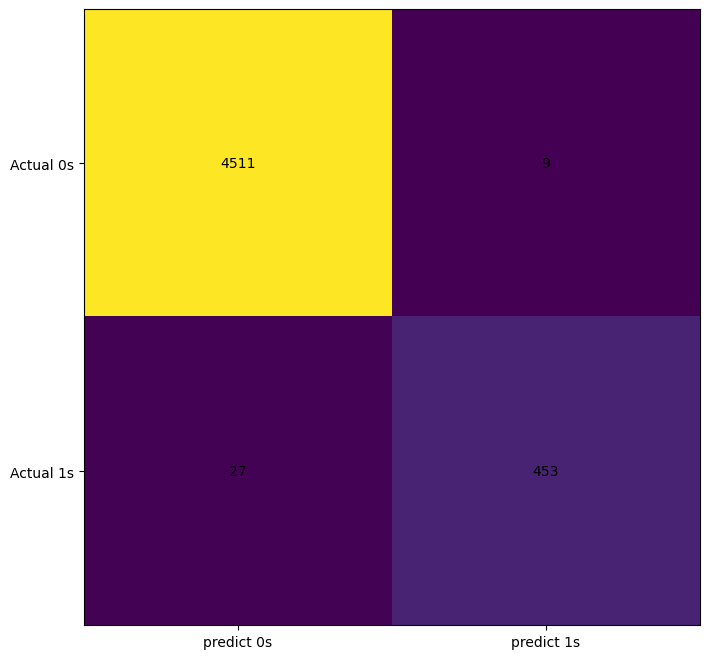

In [130]:
cm = confusion_matrix(y4, model_knn.predict(X4))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [131]:
print(classification_report(y4, model_knn.predict(X4)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4520
         1.0       0.98      0.94      0.96       480

    accuracy                           0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000



In [132]:
kfold4 = KFold(10)
cross_val_4 = cross_val_score(model_knn, X4_train, y4_train.ravel(), cv=kfold4)
print(cross_val_4)

[0.9575 0.9425 0.9725 0.965  0.9575 0.975  0.975  0.96   0.95   0.95  ]


In [133]:
print(np.mean(cross_val_4))

0.9604999999999999


# improve KNN model

In [134]:
k = 1000
Acc = np.zeros((k))
for i in range(1, k + 1):
    model_knn2 = KNeighborsClassifier(n_neighbors= i)
    model_knn2.fit(X4_train, y4_train.ravel())
    y5_pred = model_knn2.predict(X4_test)
    Acc[i - 1] = metrics.accuracy_score(y4_test, y5_pred)
    
Acc

array([0.964, 0.952, 0.961, 0.948, 0.958, 0.944, 0.951, 0.939, 0.942,
       0.942, 0.942, 0.935, 0.936, 0.933, 0.934, 0.931, 0.932, 0.929,
       0.93 , 0.93 , 0.933, 0.927, 0.932, 0.928, 0.928, 0.927, 0.927,
       0.924, 0.925, 0.925, 0.925, 0.923, 0.924, 0.922, 0.924, 0.922,
       0.924, 0.922, 0.923, 0.923, 0.926, 0.924, 0.924, 0.921, 0.922,
       0.922, 0.924, 0.922, 0.923, 0.919, 0.922, 0.92 , 0.92 , 0.917,
       0.918, 0.913, 0.913, 0.911, 0.911, 0.911, 0.912, 0.911, 0.911,
       0.91 , 0.91 , 0.909, 0.909, 0.909, 0.909, 0.909, 0.909, 0.909,
       0.909, 0.909, 0.91 , 0.909, 0.91 , 0.909, 0.909, 0.908, 0.908,
       0.908, 0.909, 0.908, 0.909, 0.908, 0.909, 0.907, 0.907, 0.906,
       0.906, 0.905, 0.905, 0.905, 0.905, 0.903, 0.904, 0.903, 0.903,
       0.903, 0.903, 0.9  , 0.902, 0.899, 0.899, 0.899, 0.899, 0.899,
       0.899, 0.899, 0.899, 0.899, 0.899, 0.897, 0.897, 0.897, 0.897,
       0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897,
       0.897, 0.897,

In [135]:
print(np.min(Acc))
print(np.max(Acc))

0.895
0.964


 ## another way to calc of K in KNN

In [136]:
X4_2 = pd.DataFrame(df_sp.drop('Personal Loan', axis=1)).values
y4_2 = pd.DataFrame(df_sp['Personal Loan']).values.reshape(-1, 1)

In [137]:
X4_2_train, X4_2_test, y4_2_train, y4_2_test = train_test_split(X4_2, y4_2, test_size=.2, random_state=42)

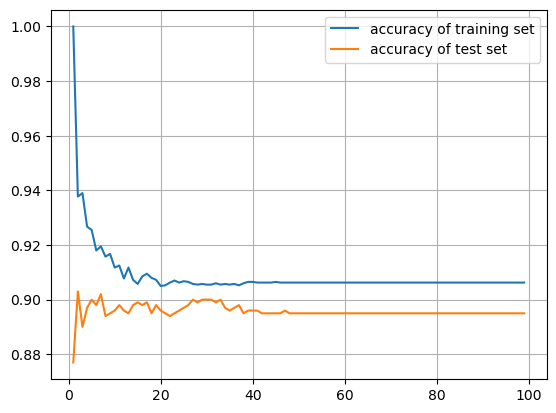

In [138]:
training_acc = []
test_acc = []
range_of_neighbors = range(1, 100)
for neighbors in range_of_neighbors:
    knn =KNeighborsClassifier(n_neighbors= neighbors)
    knn.fit(X4_2_train, y4_2_train.ravel())
    training_acc.append(knn.score(X4_2_train, y4_2_train))
    test_acc.append(knn.score(X4_2_test, y4_2_test))
plt.plot(range_of_neighbors, training_acc, label= 'accuracy of training set')
plt.plot(range_of_neighbors, test_acc, label='accuracy of test set')
plt.legend()
plt.grid()
plt.show()



# ensamble leraning

In [139]:
from sklearn.model_selection import GridSearchCV #! specially for KNN
parameters = {'n_neighbors': range(1, 100) }
grid_knn =GridSearchCV(
    estimator= knn, #!model
    param_grid= parameters, #! range of k
    scoring= 'accuracy',
    cv= 5, #! crass_val_generator
    verbose= 1, #! time to calc
    n_jobs= -1, #! cpu helper

)
grid_knn.fit(X4_train, y4_train.ravel())

Fitting 5 folds for each of 99 candidates, totalling 495 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=99), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100)}, scoring='accuracy',
             verbose=1)

In [140]:
grid_knn.best_params_

{'n_neighbors': 1}

<h1> New Feature For Predict</h1>

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [142]:
new_feature_knn = model_knn.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_knn

array([0.])

In [143]:
new_feature_logreg = model_logreg.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_logreg

array([0.])

In [144]:
new_feature_NB = model_NB.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_NB

array([0.])

In [145]:
new_feature_BNB = model_BNB.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_BNB

array([0.])

<h4> According to the above values, all four models showed the number zero, which indicates the desire not to take a loan by that new customer with new input data to all models</h4>

<h2>Building a machine learning model using different algorithms to be numbered and selected by the employer and finally return the answer<h2>

In [146]:

# def predict():
#     Age = int(input('Enter costomer Age :'))
#     Experience = int(input('Enter customer Experience :'))
#     Income = int(input('Enter customer Income :'))
#     ZIP_Code = int(input('Enter customer ZIP Code :'))
#     Family = int(input('Enter customer Family :'))
#     CCAvg = float(input('Enter customer CCAvg :'))
#     Education = int(input('Enter customer Education :'))
#     Mortgage = int(input('Enter customer Mortgage :'))
#     Securities_Account	= int(input('Enter customer Securities Account :'))
#     CD_Account	= int(input('Enter customer CD Account :'))
#     Online = int(input('Enter customer Online :'))
#     CreditCard = int(input('Enter customer CreditCard :'))
#     Choose_model = input("please choose  MODEL that you want to use(KNN, LOGREG, NB, BNB, ALL) :")
#     if Choose_model == 'KNN':
#         new_feature_KNN = model_knn.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         for i in new_feature_KNN:
#             if i == 0:
#                 print("your client does not want loan")
#             if i == 1:
#                 print("your client wants loan")
         
#     elif  Choose_model == 'LOGREG':
#         new_feature_LOGREG = model_logreg.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         for i in new_feature_LOGREG:
#             if i == 0:
#                 print("your client does not want loan")
#             if i == 1:
#                 print("your client wants loan")
#     elif  Choose_model == 'NB':
#         new_feature_NB = model_NB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         for i in new_feature_NB:
#             if i == 0:
#                 print("your client does not want loan")
#             if i == 1:
#                 print("your client wants loan")
#     elif Choose_model == 'BNB':
#         new_feature_BNB = model_BNB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         for i in new_feature_BNB:
#             if i == 0:
#                 print("your client does not want loan")
#             if i == 1:
#                 print("your client wants loan")
#     elif Choose_model == 'ALL':

#         new_feature_KNN = model_knn.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         new_feature_LOGREG = model_logreg.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         new_feature_NB = model_NB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
#         new_feature_BNB = model_BNB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])

#         Values = {'KNN' : new_feature_KNN , 'LOGREG' : new_feature_LOGREG, 'NB' : new_feature_NB, 'NBN' : new_feature_BNB}
#         models = ["KNN", "LOGREG", "NB", "BNB"]
#         counter = 0
#         predict = []
#         for i in Values.values():
#             for value in i: 
#                 if i == 0:
#                     print(f'your client does not want loan "predict by {models[counter]} Model"')
#                     counter += 1
#                     predict.append(0)
#                 if i == 1:
#                     print(f'your client wants loan "predict by {models[counter]} Model"')
#                     counter += 1
#                     predict.append(0)
#         best_value = statistics.mode(predict)
#         if best_value == 0:
#             print(f'\n \t \t \t "The results of the models show that your client does not want loan"')
#         if best_value == 1:
#             print(f'\n \t \t \t "The results of the models show that your client wants loan"')
# predict()

Enter costomer Age : 42

Enter customer Experience : 16

Enter customer Income : 30

Enter customer ZIP Code : 92037

Enter customer Family : 3

Enter customer CCAvg : 1.2

Enter customer Education : 3

Enter customer Mortgage : 0

Enter customer Securities Account : 1

Enter customer CD Account : 0

Enter customer Online : 1

Enter customer CreditCard : 1

please choose  MODEL that you want to use(KNN, LOGREG, NB, BNB, ALL) : ALL

## your client does not want loan "predict by KNN Model"

## your client does not want loan "predict by LOGREG Model"

## your client does not want loan "predict by NB Model"

## your client does not want loan "predict by BNB Model"

## "The results of the models show that your client does not want loan"